In [1]:
from utils.utils import add_path, complex_reading
from os import listdir
from pandas import DataFrame

"""
Informações das metricas usadas para gerar os dados sinteticos
Os dados sinteticos sao gerados pelo processo estocastico com algumas modificacoes
"""

synthetic_data = 'synthetic_data'
ticker = 'GOAU4'
number_of_days = '1500'
metrics = 'metric'

list_metric_file = []
for file in listdir(add_path([synthetic_data, ticker, number_of_days, metrics])):
    metric_file = complex_reading(add_path([synthetic_data, ticker, number_of_days, metrics, file]), 'read') 
    list_metric_file.append([int(file.replace('.txt', ''))] + metric_file.replace('[', '').replace(']', '').split(', '))


columns = ['file', 'static_number_M', 'static_number_S', 'number_of_dynamic_numbers',
           'dynamic_number_A_0', 'dynamic_number_A_1', 'dynamic_number_A_2', 'dynamic_number_A_3', 'dynamic_number_A_4',
           'dynamic_number_A_5', 'dynamic_number_A_6', 'dynamic_number_A_7', 'dynamic_number_A_8', 'dynamic_number_A_9']
df_data_metrics = DataFrame(list_metric_file, columns=columns)

# Todas as metricas foram geradas de forma aleatoria
df_data_metrics = df_data_metrics.fillna('nan')
df_data_metrics = df_data_metrics.sort_values('file')
df_data_metrics = df_data_metrics.set_index('file')
df_data_metrics

,static_number_M,static_number_S,number_of_dynamic_numbers,dynamic_number_A_0,dynamic_number_A_1,dynamic_number_A_2,dynamic_number_A_3,dynamic_number_A_4,dynamic_number_A_5,dynamic_number_A_6,dynamic_number_A_7,dynamic_number_A_8,dynamic_number_A_9
file,,,,,,,,,,,,,
1,-56.195150382308626,-84.82738842215385,1,-26.800080050383016,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,-0.8278447151354129,17.17229298952772,2,97.8655427608359,-24.11331873584868,nan,nan,nan,nan,nan,nan,nan,nan
3,-93.03421816099713,-72.59877358898406,1,57.740949620310374,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,-58.01936398099758,46.581530695588526,6,87.85162271476878,-99.37328187676316,62.732403765515954,47.18054470114612,-56.64885066100575,-84.9155392780806,nan,nan,nan,nan
5,-88.86397370867674,-84.24241867799455,6,-33.612689220073506,-57.169137946708325,44.34498874415408,-13.847841942815037,76.75246133539048,-19.69934111956988,nan,nan,nan,nan
6,64.315378490569,-55.30794752036054,10,62.93035074950467,46.46066197436923,-26.099560474395304,-75.75040819134718,29.15498097556565,-62.99337295534551,-81.91522258790624,74.03176666467525,13.0607182168675,60.40962518591931
7,85.52179039636584,31.72080018911626,7,-42.593091032944265,-84.2297369696102,-97.02039134505188,59.41570841560022,38.329031907362065,64.16300912649382,-39.895259673637916,nan,nan,nan
8,-9.99326075668803,-61.45100518899973,7,99.87588115510533,54.20135622809795,-48.188889038998205,29.320872240605098,-0.43693567399560607,67.67119731584131,-68.60699118015283,nan,nan,nan
9,-10.71243072350812,-27.750785152013037,4,69.30204085756804,-57.56039371389503,26.655109120667063,-4.312259208713769,nan,nan,nan,nan,nan,nan


In [2]:
from utils.utils import series_reading
from create_synthetic_data import index_syntetic_data
from pandas import to_datetime, MultiIndex, concat
"""
Informacoes dos retornos das series dos dados sinteticos
"""

serie = 'serie'

average_metrics_list_by_file = DataFrame()
for tests in listdir(add_path([synthetic_data, ticker, number_of_days, metrics])):
    id_test = tests.split('.')[0]

    # media da media e do std das series  
    average_metrics_list = []
    for file in listdir(add_path([synthetic_data, ticker, number_of_days, serie])):
        id_file = file.split('_')[0]

        # media e std de cada serie 
        if int(id_test) == int(id_file):
            df_serie = series_reading(add_path([synthetic_data, ticker, number_of_days, serie, file]))
            df_serie = DataFrame(df_serie, columns=['Date', 'serie'])
            df_serie['Date'] = to_datetime(df_serie['Date'])
            df_serie = df_serie.set_index('Date')
            df_serie['serie'] = df_serie.astype(float)
            df_serie['serie'] = df_serie['serie'].pct_change(1)

            average_metrics_list.append([id_file] + [df_serie.mean()[0], df_serie.std()[0]])

    df_average_metrics_list = DataFrame(average_metrics_list, columns=['file', 'mean', 'std'])
    df_average_metrics_list = df_average_metrics_list.describe().reset_index()
    df_average_metrics_list = df_average_metrics_list.rename(columns={'index': 'metric_macro'})
    df_average_metrics_list['file'] = average_metrics_list[0][0]
    average_metrics_list_by_file = concat([average_metrics_list_by_file, df_average_metrics_list], axis=0)

    

In [3]:
average_metrics_list_by_file[average_metrics_list_by_file['file']=='50']

,metric_macro,mean,std,file
0,count,300.000000,300.000000,50
1,mean,0.000055,0.022794,50
2,std,0.000588,0.001705,50
3,min,-0.001119,0.017577,50
4,25%,-0.000395,0.021944,50
5,50%,-0.000009,0.023171,50
6,75%,0.000472,0.024110,50
7,max,0.001837,0.025380,50


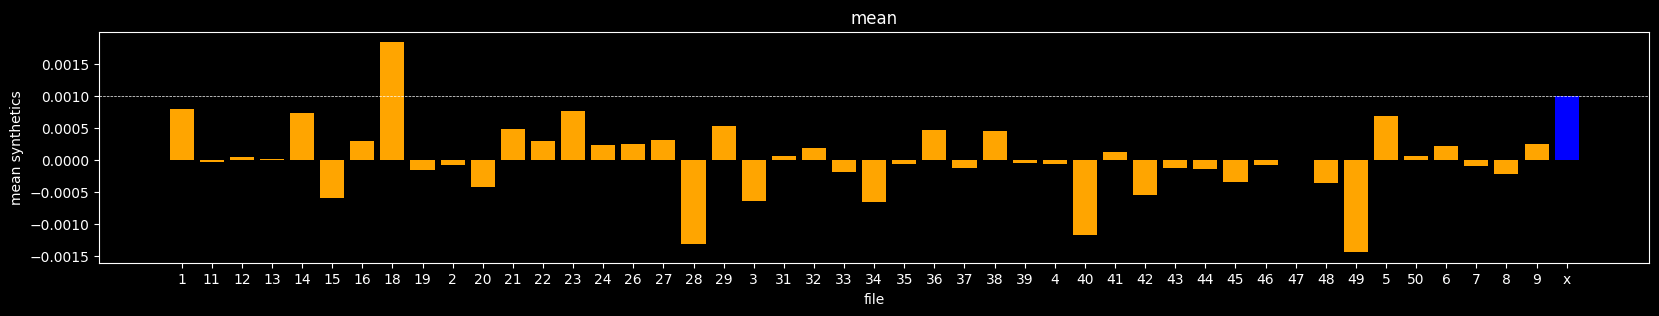

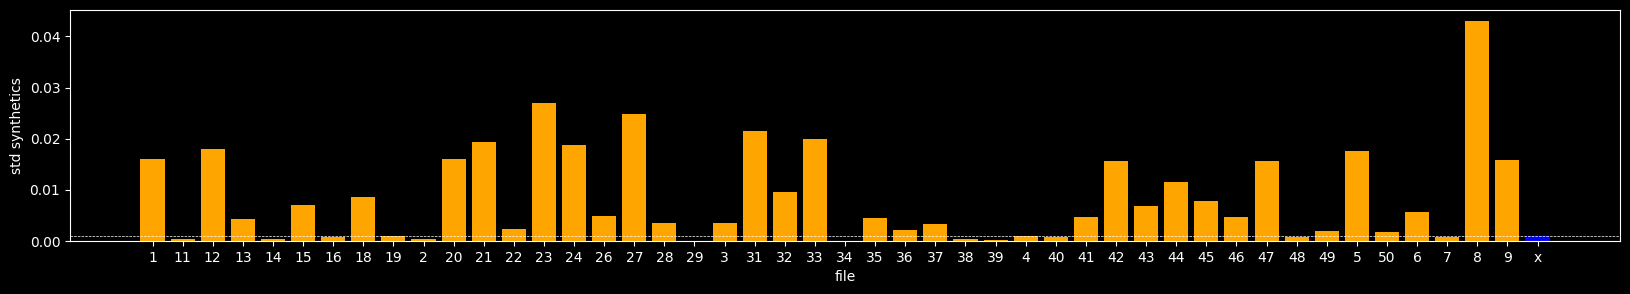

In [6]:
import matplotlib.pyplot as plt

from utils.request_price import get_prices_yf
df_price = get_prices_yf('goau4.sa', period='5y')
df_price = df_price.pct_change(1).mean().reset_index()
df_price['index'] = 'x'
df_price_mean = df_price.rename(columns={'index': 'file', 0: 'mean'})
df_price_std = df_price.rename(columns={'index': 'file', 0:'std'})

df_plot1 = DataFrame()
df_plot2 = DataFrame()
for file in listdir(add_path([synthetic_data, ticker, number_of_days, metrics])):
    id_file = file.split('.')[0]
    df_metrics = average_metrics_list_by_file.loc[average_metrics_list_by_file['file']==id_file]
    
    mean_mean = df_metrics.loc[df_metrics['metric_macro']=='mean'][['file', 'mean']]
    df_plot1 = concat([df_plot1, mean_mean], axis=0)

    std_std = df_metrics.loc[df_metrics['metric_macro']=='std'][['file', 'std']]
    df_plot2 = concat([df_plot2, std_std])

# Adicionando preco do ativo
df_plot1 = concat([df_plot1, df_price_mean])
df_plot2 = concat([df_plot2, df_price_std])

# removendo outlier
df_plot1 = df_plot1[df_plot1['file'] != '25'] 
df_plot2 = df_plot2[df_plot2['file'] != '25'] 

df_plot1 = df_plot1[df_plot1['file'] != '17'] 
df_plot2 = df_plot2[df_plot2['file'] != '17'] 

df_plot1 = df_plot1[df_plot1['file'] != '10'] 
df_plot2 = df_plot2[df_plot2['file'] != '10'] 

df_plot1 = df_plot1[df_plot1['file'] != '30'] 
df_plot2 = df_plot2[df_plot2['file'] != '30'] 

color = ['orange' for _ in range(len(df_plot1))]
color[-1] = 'blue'

plt.figure(figsize=(20, 3))
plt.title('mean')
plt.bar(df_plot1['file'], df_plot1['mean'], color=color)
plt.axhline(df_price_mean['mean'][0], linewidth=0.50, linestyle='--')
plt.xlabel('file')
plt.ylabel('mean synthetics')

plt.figure(figsize=(20, 3))
plt.bar(df_plot2['file'], df_plot2['std'], color=color)
plt.axhline(df_price_std['std'][0], linewidth=0.50, linestyle='--')
plt.xlabel('file')
plt.ylabel('std synthetics')
plt.show()


In [ ]:
"""
static_number_M e static_number_S sao numeros aleatórios que nao mudam de valor 
durante a criacao dos dados sinteticos

number_of_dynamic_numbers e a quantidade de daynamic_number_A_... que sera gerado

daynamic_number_A_... sao numeros aleatorios que serao escolhidos de forma aleatoria durante a geracao dos dados

"""

In [24]:
n = 36
m = df_data_metrics.iloc[n]
m

static_number_M              -59.98685307701099
static_number_S               94.39412898204893
number_of_dynamic_numbers                     3
dynamic_number_A_0           -83.27343363019959
dynamic_number_A_1            64.99290948478637
dynamic_number_A_2            74.97856188390273
dynamic_number_A_3                          nan
dynamic_number_A_4                          nan
dynamic_number_A_5                          nan
dynamic_number_A_6                          nan
dynamic_number_A_7                          nan
dynamic_number_A_8                          nan
dynamic_number_A_9                          nan
Name: 37, dtype: object

In [25]:
dynamic_number_A = list(map(float, list(m[3:][m[3:] != 'nan'].values)))
dynamic_number_A

[-83.27343363019959, 64.99290948478637, 74.97856188390273]

[-83.27343363019959, 64.99290948478637, 74.97856188390273]


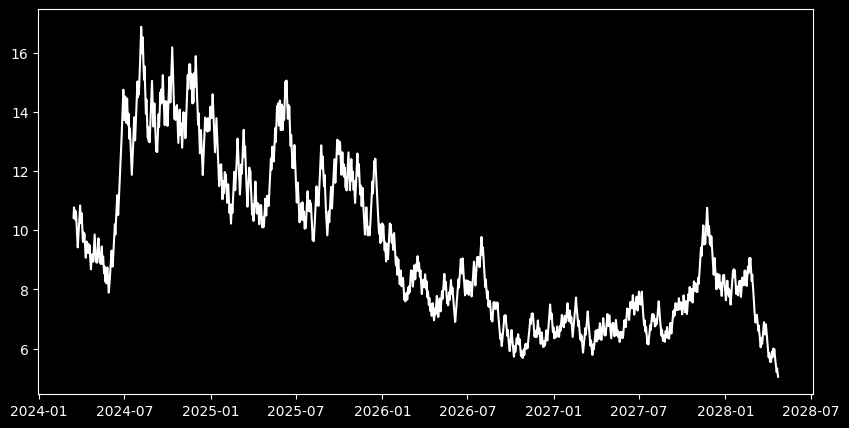

In [40]:

from create_synthetic_data import synthetic_data_c
df_price = get_prices_yf('goau4.sa', period='1y')

print(dynamic_number_A)

df_data_result = synthetic_data_c(
    last_price=df_price.iloc[-1][0],
    start_date=None,
    number_of_days=1500,
    static_number_M=float(m['static_number_M']),
    static_number_S=float(m['static_number_S']),
    dynamic_number_A=dynamic_number_A)

plt.figure(figsize=(10, 5))
plt.plot(df_data_result, color='w')
plt.show()

In [37]:
from utils import model_parts

"""
Modelo sendo treinado no retorno da serie sintetica
e o predict sendo aplicado no retorno do ativo
"""
df_price = get_prices_yf('goau4.sa', period='5y')

df_data_components_synthetics_train = model_parts.create_components(df_data_result).dropna()
df_data_components_stock_test = model_parts.create_components(df_price).dropna()

from sklearn.tree import DecisionTreeClassifier
coef = DecisionTreeClassifier(criterion='gini', max_depth=3)
coef.fit(df_data_components_synthetics_train[['retorno']].values, df_data_components_synthetics_train['alvo_bin'])

predict_train = coef.predict(df_data_components_synthetics_train[['retorno']])
predict_test = coef.predict(df_data_components_stock_test[['retorno']])

df_data_components_synthetics_train['previsto'] = predict_train
df_data_components_stock_test['previsto'] = predict_test
 
# Eu estou concatenado o teste primeiro por conta das datas do indice, a data do teste e a futura
# a data do treino e a passada
df_data = concat([df_data_components_stock_test, df_data_components_synthetics_train], axis=0)

result_model = model_parts.result_model_b(df_data, df_data[['previsto']])

metrics = model_parts.metrics(df_data_components_synthetics_train,
                              df_data_components_stock_test,
                              predict_train,
                              predict_test,
                              result_model.serie_retorno,
                              result_model
                              )
metrics

[52.87049399198932,
 50.72463768115942,
 0.6781021897810219,
 0.5177133655394525,
 0,
 [1034, 464],
 [1201, 41],
 2.145856310829899]

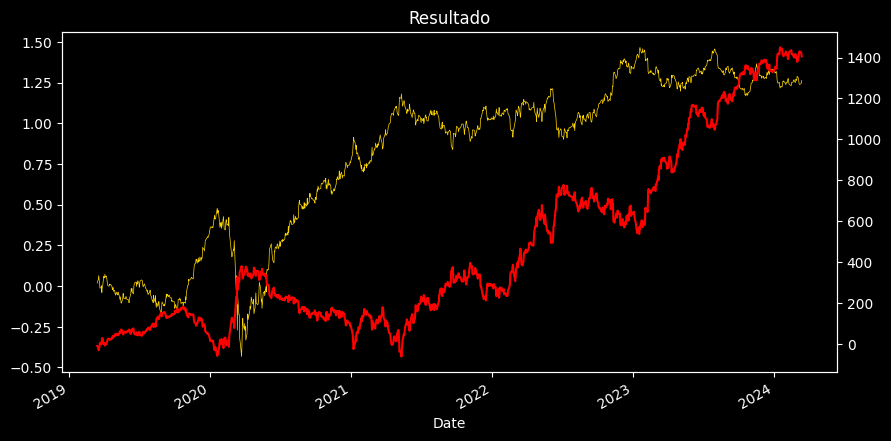

In [41]:
result_model_price_stock = model_parts.result_model_b(df_data_components_stock_test, df_data_components_stock_test['previsto'])
plt.figure(figsize=(10, 5))
result_model_price_stock['retorno'].cumsum().plot(color='gold', linewidth=0.50)
result_model_price_stock['retorno_modelo'].plot(secondary_y=True, color='r')
plt.title('Resultado')
plt.show()